<a href="https://colab.research.google.com/github/hanashameer/income-prediction/blob/main/Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GROUP 5**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/tech4alltraining/aiml/refs/heads/main/datasets/classification/adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.head()  #first 5 rows

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.tail()        #last 5 rows

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**EDA**

In [ ]:
#number of rows and columns
df.shape

(32561, 15)

In [ ]:
# identify categorical and numerical
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


In [ ]:
df.describe()                                #summary statistics

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# listing numerical and categorical features using df.select_dtypes
numericfeatures=df.select_dtypes('int64','float64').columns.tolist()
numericfeatures

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [ ]:
#categorical features
categoricfeatures=df.select_dtypes('object').columns.tolist()
categoricfeatures

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [ ]:
#to show uniques in categorical columns
for unique in categoricfeatures:
  print(df[unique].unique())

['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
['Female' 'Male']
['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germ

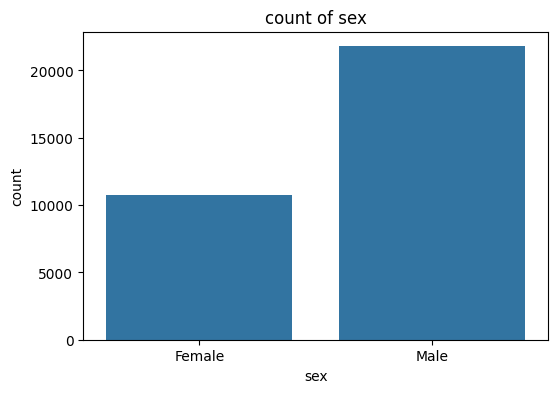

In [ ]:
#plotting bar graph (categorical) of sex,education and workclass  ,using seaborn
plt.figure(figsize=(6,4)) #6wide,4 tall
sns.countplot(x='sex',data=df) #determining of sex
plt.title('count of sex')
plt.show()

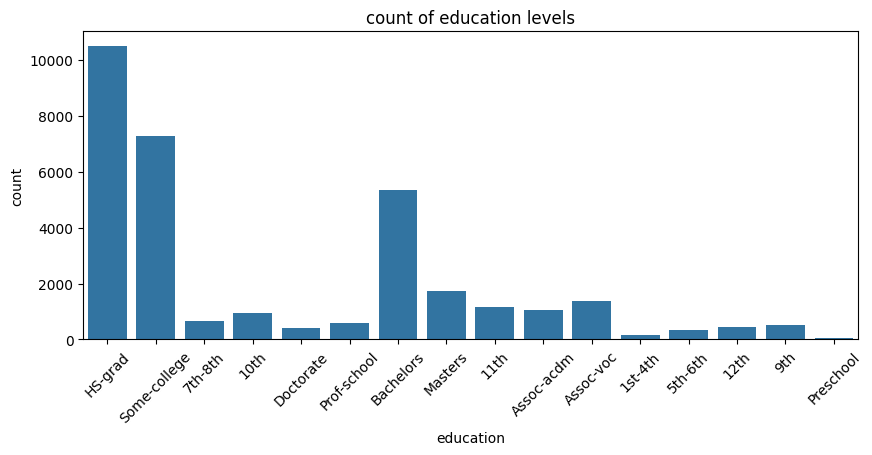

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='education',data=df)
plt.title('count of education levels')
plt.xticks(rotation=45)# to see values clearly
plt.show()

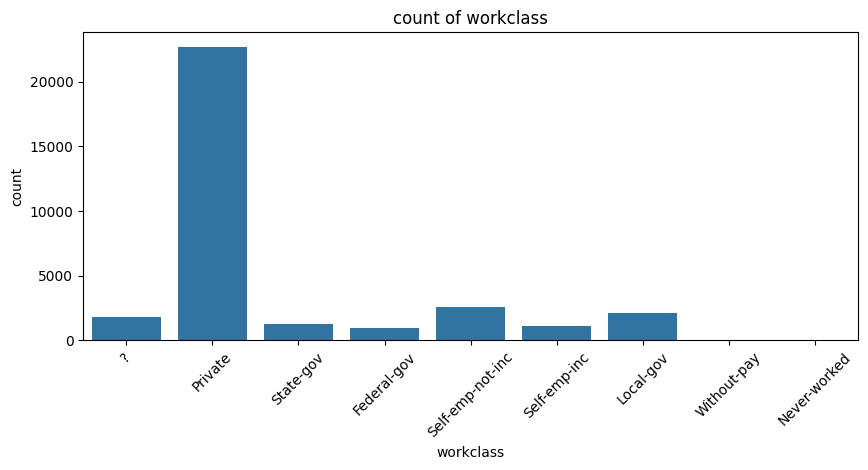

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='workclass',data=df)
plt.title('count of workclass')
plt.xticks(rotation=45)
plt.show()

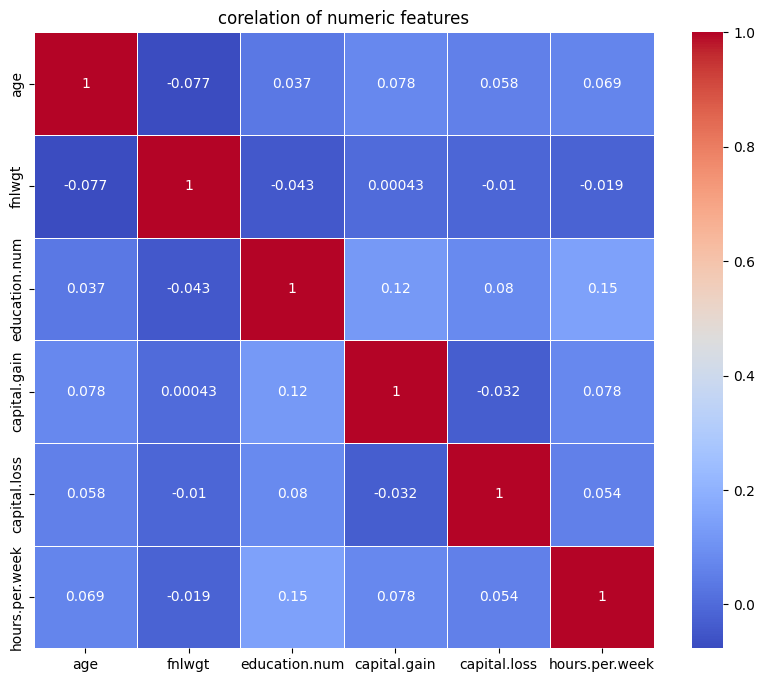

In [ ]:
#showing corelation between numeric categories using df.corr like how numeric categorie are related with each other.
corelation_matrix=df.corr(numeric_only='True')  # only for numeric
# ploting heatmap using sns
plt.figure(figsize=(10,8))
sns.heatmap(corelation_matrix,annot=True,cmap='coolwarm',linewidth=0.5) #heat map of corealtion, cmap(coolwarm) for redblue colour,annot=true gives the corelation in number
plt.title('corelation of numeric features')
plt.show()


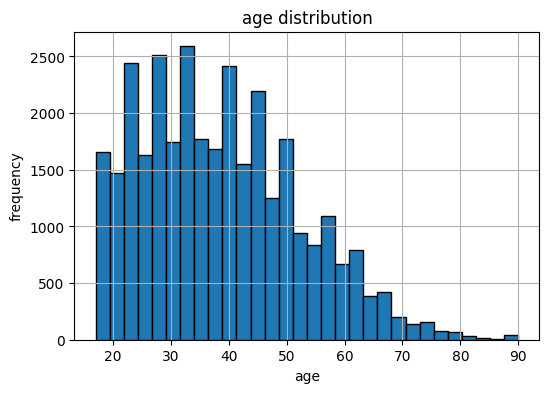

In [ ]:
#distribution of numerical ,plotting histogram using .hist  of age,hours per week and capital gain
plt.figure(figsize=(6,4))
df['age'].hist(bins=30,edgecolor='black')  #here bins is dividing into groups,more bins more details
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()



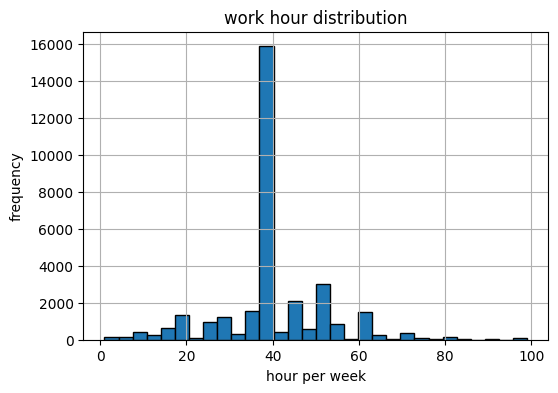

In [ ]:
plt.figure(figsize=(6,4))
df['hours.per.week'].hist(bins=30,edgecolor='black')
plt.title('work hour distribution')
plt.xlabel('hour per week')
plt.ylabel('frequency')
plt.show()

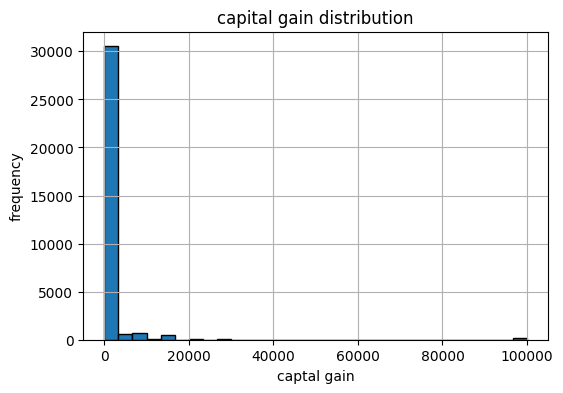

In [ ]:
plt.figure(figsize=(6,4))
df['capital.gain'].hist(bins=30,edgecolor='black')
plt.title('capital gain distribution')
plt.xlabel('captal gain')
plt.ylabel('frequency')
plt.show()

**Preprocessing**

In [ ]:
#changing ? to nan using numpy
df.replace('?',np.nan,inplace=True) #inplace=True is for updating the dataframe like used for reshape(),drop(),fillna()
df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
#replacing nan with mode(( most common) for workclass,occupation,native.country, imputation process using sklearn
from sklearn.impute import SimpleImputer #importing a class
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent') #object
imputer.fit(df[['workclass','occupation','native.country']])
df[['workclass','occupation','native.country']] = imputer.transform(df[['workclass','occupation','native.country']])
df
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
#droping unwanted columns herefnlwgt
df.drop(columns=['fnlwgt'],inplace=True)      #Not Useful for Prediction
df.drop(columns=['education'],inplace=True)
#either education.num or education is necessary
df.info()
#removed fnlwgt column and education now remaining total 13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education.num   32561 non-null  int64 
 3   marital.status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  native.country  32561 non-null  object
 12  income          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [ ]:
#checking duplicates
beforedrop=df.duplicated().sum()
print(beforedrop)
df.drop_duplicates(inplace=True)
afterdrop=df.duplicated().sum()
print(afterdrop)
#removed 3591 rows



3591
0


In [ ]:
df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


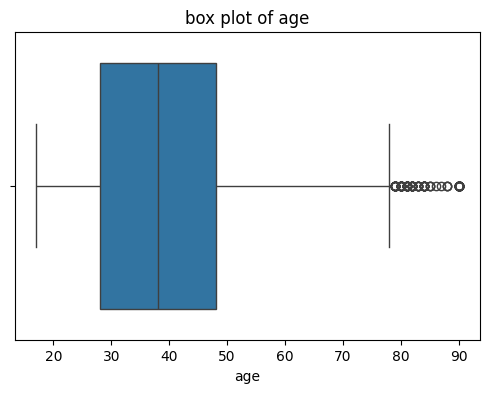

In [ ]:
#checking outliers using boxplot for numeric variabes like age,hours per week,capital gain , capitalloss
#df.hist for histogram, sns.countplot for bar ,sns.heatmap for heatmap also sns.boxpot
plt.figure(figsize=(6,4))
sns.boxplot(x='age',data=df)
plt.title('box plot of age')
plt.show()


In [ ]:
#handling outliers
q1, q3 = np.percentile(df['age'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)
# Drop the outliers
df=df[(df['age'] >= lower_bound)  & (df['age'] <= upper_bound)]
df

-2.0 78.0


,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


<Axes: ylabel='age'>

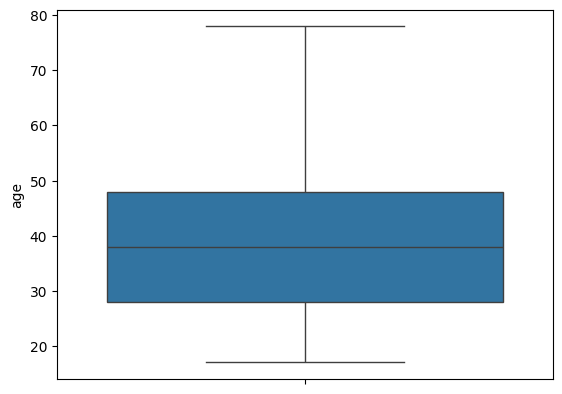

In [ ]:
sns.boxplot(df['age'])

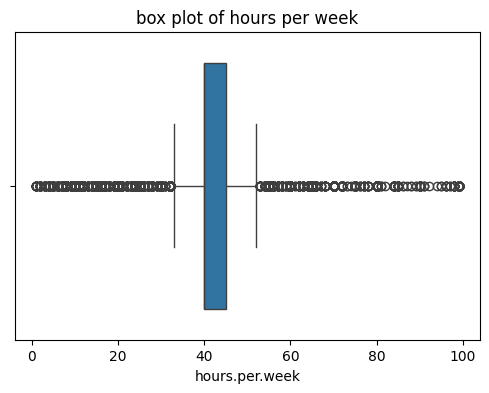

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='hours.per.week',data=df)
plt.title('box plot of hours per week')
plt.show()

In [ ]:
#handling outliers
q1, q3 = np.percentile(df['hours.per.week'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)
# Drop the outliers
df=df[(df['hours.per.week'] >= lower_bound)  & (df['hours.per.week'] <= upper_bound)]
df

32.5 52.5


,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,43,Private,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32555,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


<Axes: ylabel='hours.per.week'>

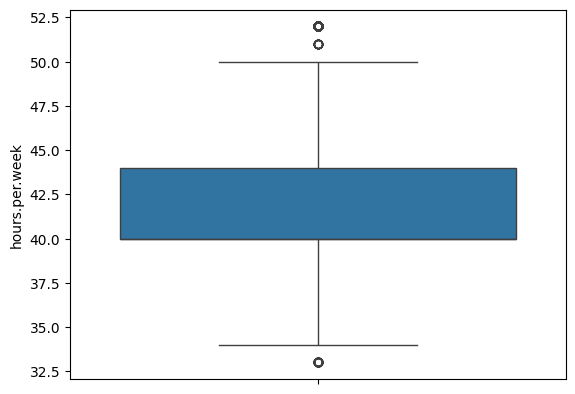

In [ ]:
sns.boxplot(df['hours.per.week'])

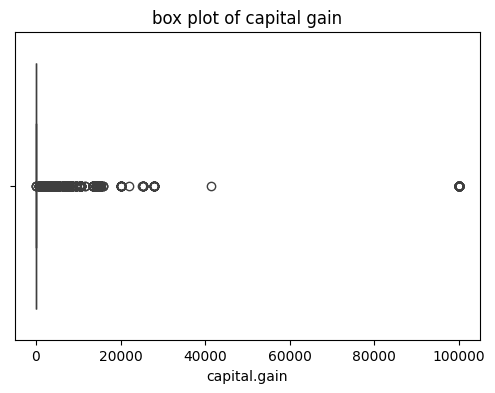

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='capital.gain',data=df)
plt.title('box plot of capital gain')
plt.show()


In [ ]:
#handling outliers
q1, q3 = np.percentile(df['capital.gain'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)
# Drop the outliers
df=df[(df['capital.gain'] >= lower_bound)  & (df['capital.gain'] <= upper_bound)]
df

0.0 0.0


,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,43,Private,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32555,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


<Axes: ylabel='capital.gain'>

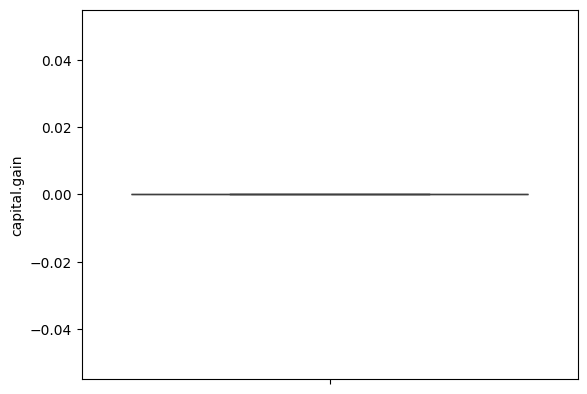

In [ ]:
sns.boxplot(df['capital.gain'])

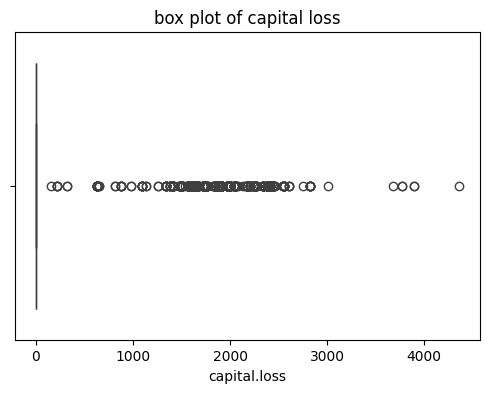

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='capital.loss',data=df)
plt.title('box plot of capital loss')
plt.show()

In [ ]:
#handling outliers
q1, q3 = np.percentile(df['capital.loss'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)
# Drop the outliers
df=df[(df['capital.loss'] >= lower_bound)  & (df['capital.loss'] <= upper_bound)]
df

0.0 0.0


,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4232,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4233,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4234,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4235,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4237,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,43,Private,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32555,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


<Axes: ylabel='capital.loss'>

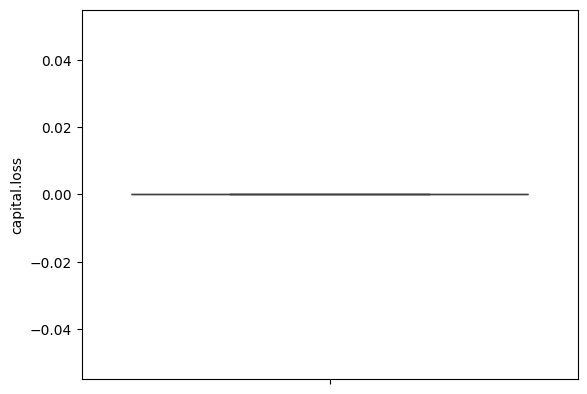

In [ ]:
sns.boxplot(df['capital.loss'])

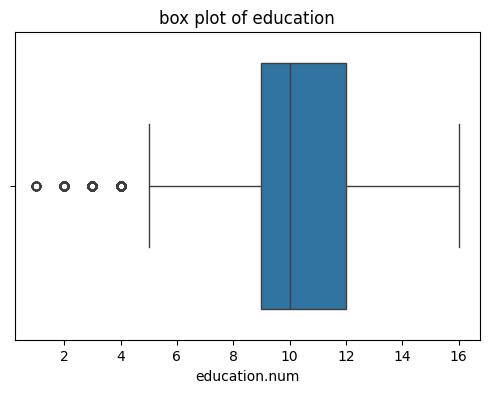

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='education.num',data=df)
plt.title('box plot of education')
plt.show()

In [ ]:
#handling outliers
q1, q3 = np.percentile(df['education.num'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)
# Drop the outliers
df=df[(df['education.num'] >= lower_bound)  & (df['education.num'] <= upper_bound)]
df

4.5 16.5


,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4232,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4233,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4234,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4235,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4237,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,43,Private,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32555,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


<Axes: ylabel='education.num'>

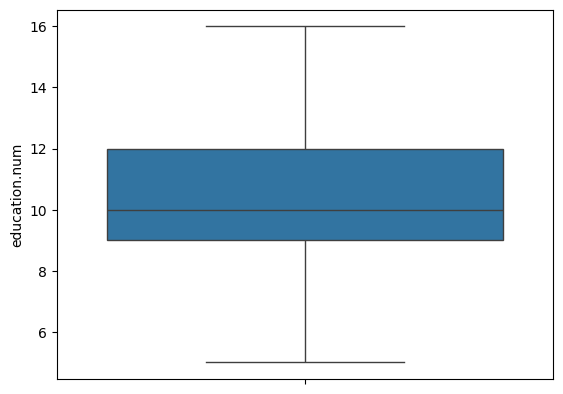

In [ ]:
sns.boxplot(df['education.num'])

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['income']=le.fit_transform(df['income'])
df['workclass']=le.fit_transform(df['workclass'])
df['marital.status']=le.fit_transform(df['marital.status'])
df['occupation']=le.fit_transform(df['occupation'])
df['race']=le.fit_transform(df['race'])
df['sex']=le.fit_transform(df['sex'])
df['native.country']=le.fit_transform(df['native.country'])
df['relationship']=le.fit_transform(df['relationship'])
df

/tmp/ipython-input-38-1154629815.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income']=le.fit_transform(df['income'])
/tmp/ipython-input-38-1154629815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass']=le.fit_transform(df['workclass'])
/tmp/ipython-input-38-1154629815.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4232,38,3,9,0,5,1,4,1,0,0,40,37,0
4233,53,3,7,2,5,0,2,1,0,0,40,37,0
4234,28,3,13,2,9,5,2,0,0,0,40,4,0
4235,37,3,14,2,3,5,4,0,0,0,40,37,0
4237,52,5,9,2,3,0,4,1,0,0,45,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,43,3,11,2,11,0,4,1,0,0,45,37,0
32555,53,3,14,2,3,0,4,1,0,0,40,37,1
32556,22,3,10,4,10,1,4,1,0,0,40,37,0
32557,27,3,12,2,12,5,4,0,0,0,38,37,0


In [ ]:
#feature scaling  for better performace using minmax scaling for numerical features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['age','hours.per.week','capital.gain','capital.loss']]=scaler.fit_transform(df[['age','hours.per.week','capital.gain','capital.loss']])
df

/tmp/ipython-input-39-3103586284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['age','hours.per.week','capital.gain','capital.loss']]=scaler.fit_transform(df[['age','hours.per.week','capital.gain','capital.loss']])


,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4232,0.344262,3,9,0,5,1,4,1,0.0,0.0,0.368421,37,0
4233,0.590164,3,7,2,5,0,2,1,0.0,0.0,0.368421,37,0
4234,0.180328,3,13,2,9,5,2,0,0.0,0.0,0.368421,4,0
4235,0.327869,3,14,2,3,5,4,0,0.0,0.0,0.368421,37,0
4237,0.573770,5,9,2,3,0,4,1,0.0,0.0,0.631579,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,0.426230,3,11,2,11,0,4,1,0.0,0.0,0.631579,37,0
32555,0.590164,3,14,2,3,0,4,1,0.0,0.0,0.368421,37,1
32556,0.081967,3,10,4,10,1,4,1,0.0,0.0,0.368421,37,0
32557,0.163934,3,12,2,12,5,4,0,0.0,0.0,0.263158,37,0


In [ ]:
#2nd week

In [ ]:
df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4232,0.344262,3,9,0,5,1,4,1,0.0,0.0,0.368421,37,0
4233,0.590164,3,7,2,5,0,2,1,0.0,0.0,0.368421,37,0
4234,0.180328,3,13,2,9,5,2,0,0.0,0.0,0.368421,4,0
4235,0.327869,3,14,2,3,5,4,0,0.0,0.0,0.368421,37,0
4237,0.573770,5,9,2,3,0,4,1,0.0,0.0,0.631579,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,0.426230,3,11,2,11,0,4,1,0.0,0.0,0.631579,37,0
32555,0.590164,3,14,2,3,0,4,1,0.0,0.0,0.368421,37,1
32556,0.081967,3,10,4,10,1,4,1,0.0,0.0,0.368421,37,0
32557,0.163934,3,12,2,12,5,4,0,0.0,0.0,0.263158,37,0


**week 2**

In [ ]:
#splitting
from sklearn.model_selection import train_test_split #traintestsplit is a function
# X=all features ,Y=target
X=df.drop(columns='income') #dropping target to get features
Y=df['income']              #target
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42) #splitting,0.2 shows 80%for training ,20%for testing ,random state=42 keeps the split same everytime

#show sample size
print('shape of X_train:',X_train.shape) #size of features for training
print('shape of Y_train:',Y_train.shape) #size of target column for training
print('shape of X_test :',X_test.shape)  #size of features for testing, this is used for predicting and becomes Y_predict
print('shape of Y_test:',Y_test.shape)  #size of target column ,this is the final result compared with Y_predict


shape of X_train: (13305, 12)
shape of Y_train: (13305,)
shape of X_test : (3327, 12)
shape of Y_test: (3327,)


In [ ]:
# 1.Logistic Regression
from sklearn.linear_model import LogisticRegression #class
lr=LogisticRegression(max_iter=500)
lr.fit(X_train,Y_train) #training


LogisticRegression(max_iter=500)

In [ ]:
Y_predict=lr.predict(X_test)#predicting
Y_predict
#classification algorithm results 1 or 0,uses a sigmoid function to predict probability (0 to 1),if probability >0.5 predicts 1 else 0 ,draws straight line or plane to seperate classes


array([0, 0, 0, ..., 0, 1, 0])

0.8205590622182146
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2648
           1       0.62      0.30      0.41       679

    accuracy                           0.82      3327
   macro avg       0.73      0.63      0.65      3327
weighted avg       0.80      0.82      0.80      3327



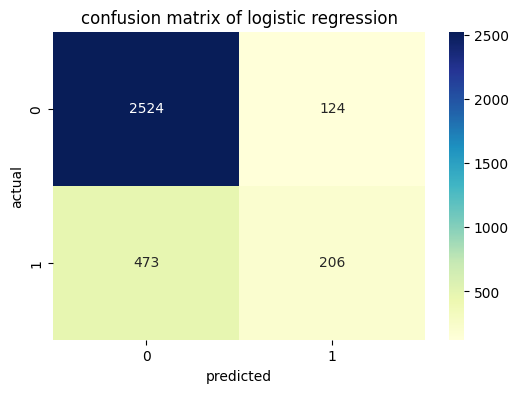

' top left true negative correctly predicted like <= 50k\n    top right false positive incorrectly predicted  like Predicted >50K, but actually <=50K (mistake)\n    bottom left false negative incorrectly predicted like Predicted <=50K, but actually >50K (mistake)\n    bottom right true positive correctly predicted like >=50k'

In [ ]:
#Accucary, Confusion Matrix, Classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict)) #precision-Of all predicted >50K, how many were correct? (Trust in “yes”) ,recall-Of all actual >50K, how many did we catch? ,f1-score-Balance between precision and recall ,support-How many real examples were there?
#plotting confusion matrix
cmlogistic=confusion_matrix(Y_test,Y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cmlogistic,annot=True,fmt='d',cmap='YlGnBu')#annot=True shows numbers d tell only integers
plt.title('confusion matrix of logistic regression')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()
''' top left true negative correctly predicted like <= 50k
    top right false positive incorrectly predicted  like Predicted >50K, but actually <=50K (mistake)
    bottom left false negative incorrectly predicted like Predicted <=50K, but actually >50K (mistake)
    bottom right true positive correctly predicted like >=50k'''
    #0 less then 50k and  1 greater then 50k








In [ ]:
#2.k-Nearest Neighbours (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) #n-neigbours=5 is default
knn.fit(X_train, Y_train)
#when a new input come it check k nearest points votes based on majority eg:out of 5 neighbours  3 have >5ok itpredicts >50k


KNeighborsClassifier()

[0 0 0 ... 0 1 0]
0.8109407874962429
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2648
           1       0.54      0.48      0.51       679

    accuracy                           0.81      3327
   macro avg       0.71      0.69      0.70      3327
weighted avg       0.80      0.81      0.81      3327



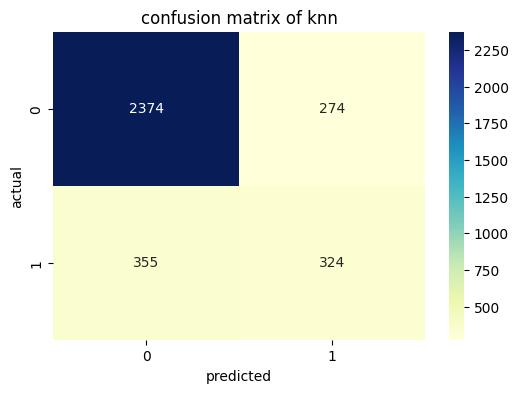

In [ ]:
#Test Model
Y_predict = knn.predict(X_test)
print(Y_predict) #predicting
print(accuracy_score(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))
#plotting confusion matrix
cmknn=confusion_matrix(Y_test,Y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cmknn,annot=True,fmt='d',cmap='YlGnBu')
plt.title('confusion matrix of knn')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
#3. Model - Support vector machine (SVM)
from sklearn.svm import SVC
svc = SVC(kernel='linear') #linear draw straight line between classes,others are rbf draw curved boundaries
svc.fit(X_train, Y_train)
#It finds the best straight line that separates two classes with the widest margin between them

SVC(kernel='linear')

[0 0 0 ... 0 0 0]
0.795912233243162
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2648
           1       0.00      0.00      0.00       679

    accuracy                           0.80      3327
   macro avg       0.40      0.50      0.44      3327
weighted avg       0.63      0.80      0.71      3327



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


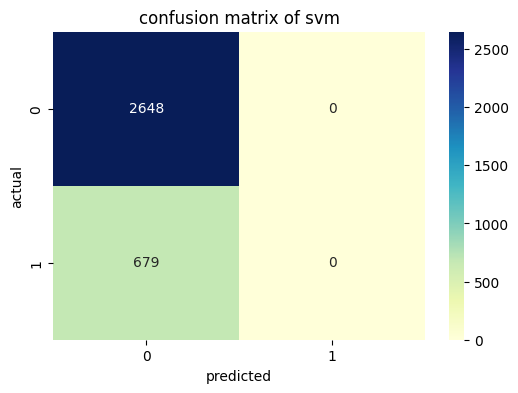

In [ ]:
Y_predict = svc.predict(X_test)
print(Y_predict)
print(accuracy_score(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))
#plotting confusion matrix
cmsvc=confusion_matrix(Y_test,Y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cmsvc,annot=True,fmt='d',cmap='YlGnBu')
plt.title('confusion matrix of svm')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
#4.Naive_Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
#using individual probabilities eg:if 70% of people over age 40 & 80% with high hours earn >50k then a person come with this it will predict >50k

GaussianNB()

[0 0 0 ... 0 1 0]
0.7995190862639014
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2648
           1       0.51      0.65      0.57       679

    accuracy                           0.80      3327
   macro avg       0.70      0.74      0.72      3327
weighted avg       0.82      0.80      0.81      3327



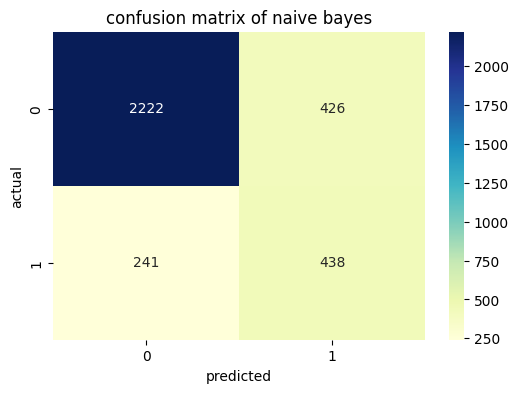

In [ ]:
Y_predict = nb.predict(X_test)
print(Y_predict)
print(accuracy_score(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))
#plotting confusion matrix
cmnb=confusion_matrix(Y_test,Y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cmnb,annot=True,fmt='d',cmap='YlGnBu')
plt.title('confusion matrix of naive bayes')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
#5.Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
#It splits the data into branches based on conditions until it reaches a decision

DecisionTreeClassifier()

[0 0 1 ... 0 0 0]
0.7532311391644124
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2648
           1       0.41      0.46      0.43       679

    accuracy                           0.75      3327
   macro avg       0.63      0.64      0.64      3327
weighted avg       0.76      0.75      0.76      3327



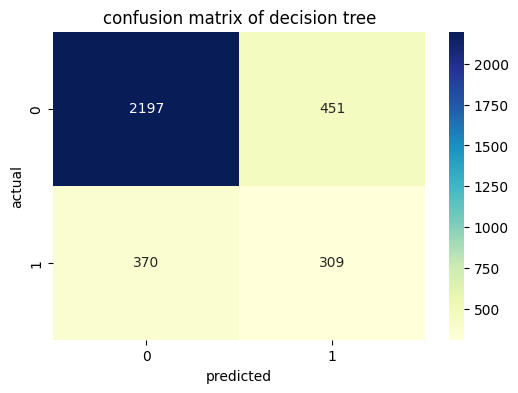

In [ ]:
Y_predict = dt.predict(X_test)
print(Y_predict)
print(accuracy_score(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))
#plotting confusion matrix
cmdt=confusion_matrix(Y_test,Y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cmdt,annot=True,fmt='d',cmap='YlGnBu')
plt.title('confusion matrix of decision tree')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
#6.Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200) #create a forest with 200 trees
rf.fit(X_train, Y_train)
#it builds many decisiom trees and uses majority voting to make stable predictions

RandomForestClassifier(n_estimators=200)

[0 0 1 ... 0 0 0]
0.8016230838593328
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2648
           1       0.52      0.47      0.49       679

    accuracy                           0.80      3327
   macro avg       0.69      0.68      0.68      3327
weighted avg       0.80      0.80      0.80      3327



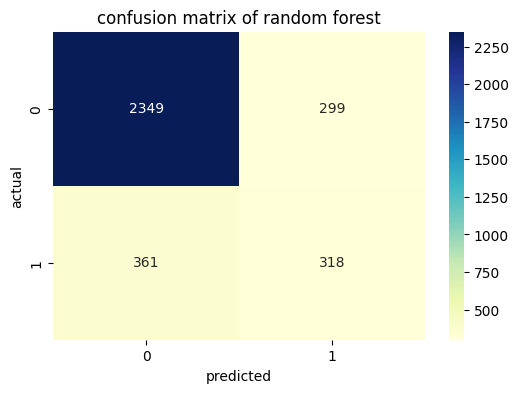

In [ ]:
Y_predict = rf.predict(X_test)
print(Y_predict)
print(accuracy_score(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))
#plotting confusion matrix
cmrf=confusion_matrix(Y_test,Y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cmrf,annot=True,fmt='d',cmap='YlGnBu')#annot=True shows numbers d tell only integers
plt.title('confusion matrix of random forest')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
#7.MLP classifier (neural network)
from sklearn.neural_network import MLPClassifier
#Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,5), max_iter=1000, random_state=42) #3 hidden layers
# Train the MLP model
mlp.fit(X_train, Y_train)
# A neural network that learns by passing data through different layers of neurons


MLPClassifier(hidden_layer_sizes=(10, 10, 5), max_iter=1000, random_state=42)

In [ ]:
# Make predictions on the test set
Y_predict = mlp.predict(X_test)
Y_predict

array([0, 0, 0, ..., 0, 1, 0])

0.8367899008115419
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2648
           1       0.62      0.53      0.57       679

    accuracy                           0.84      3327
   macro avg       0.75      0.72      0.73      3327
weighted avg       0.83      0.84      0.83      3327



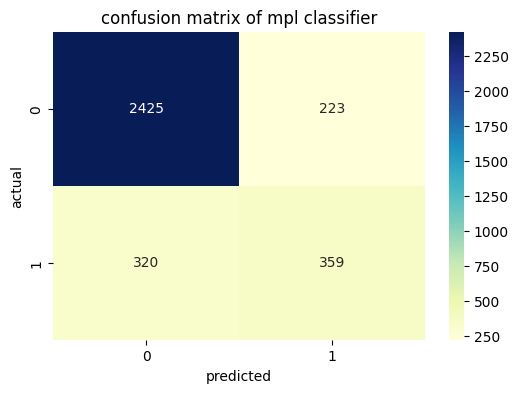

In [ ]:
print(accuracy_score(Y_test, Y_predict))
print(classification_report(Y_test,Y_predict))
#plotting confusion matrix
cmmlp=confusion_matrix(Y_test,Y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cmmlp,annot=True,fmt='d',cmap='YlGnBu')
plt.title('confusion matrix of mpl classifier')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
#8.gradient boosting clssifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)#100 small trees(depth 3) each improving previous result with learning rate of 0.1(common)
gbc.fit(X_train, Y_train)
#It builds decision trees one after another, each one fixing the previous one’s mistakes

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions
Y_predict = gbc.predict(X_test)
Y_predict

array([0, 0, 0, ..., 0, 1, 0])

Accuracy: 0.8443041779380823
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      2648
           1       0.65      0.51      0.57       679

    accuracy                           0.84      3327
   macro avg       0.77      0.72      0.74      3327
weighted avg       0.83      0.84      0.84      3327

[[2460  188]
 [ 330  349]]


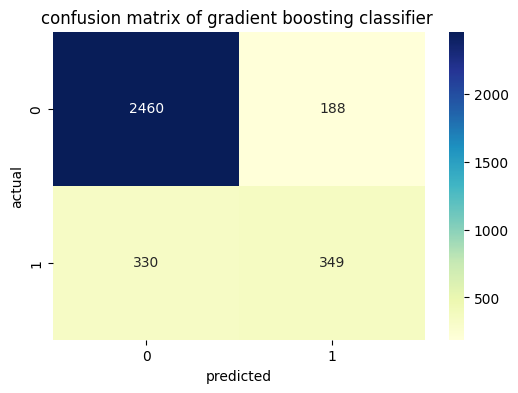

In [ ]:
print("Accuracy:", accuracy_score(Y_test, Y_predict))
print("Classification Report:\n", classification_report(Y_test, Y_predict))
print(confusion_matrix(Y_test, Y_predict))

#plotting confusion matrix
cmgbc=confusion_matrix(Y_test,Y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cmgbc,annot=True,fmt='d',cmap='YlGnBu')
plt.title('confusion matrix of gradient boosting classifier ')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
#9.XGB Classifier
from xgboost import XGBClassifier
# Initialize the XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,eval_metric='logloss', random_state=42) #evel_metric required for binry classification
# Train the model
xgb.fit(X_train, Y_train)
#It’s an optimized version of Gradient Boosting that’s faster, smarter, and commonly used in real-world ML

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
Y_predict = xgb.predict(X_test)
Y_predict

array([0, 0, 0, ..., 0, 1, 0])

Accuracy: 0.8443041779380823
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      2648
           1       0.65      0.51      0.57       679

    accuracy                           0.84      3327
   macro avg       0.77      0.72      0.74      3327
weighted avg       0.83      0.84      0.84      3327

[[2466  182]
 [ 336  343]]


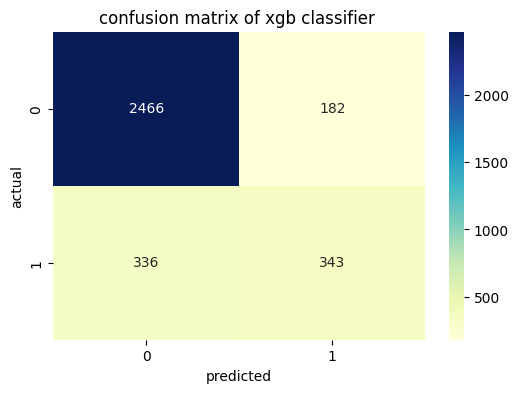

In [ ]:
print("Accuracy:", accuracy_score(Y_test, Y_predict))
print("Classification Report:\n", classification_report(Y_test, Y_predict))
print(confusion_matrix(Y_test, Y_predict))

#plotting confusion matrix
cmxgb=confusion_matrix(Y_test,Y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cmxgb,annot=True,fmt='d',cmap='YlGnBu')
plt.title('confusion matrix of xgb classifier ')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

**Week 3**

In [ ]:
#hyperparameter tunning
'''Hyperparameter tuning is the process of selecting the best configuration settings for a machine learning model to improve its performance.
Hyperparameters are values set before training (like n_neighbours in kNN or n_estimators in Random Forest) and are not learned from the data.
so two type manualy and automated tunning(Gridsearchcv) here we use automated tunning '''


'Hyperparameter tuning is the process of selecting the best configuration settings for a machine learning model to improve its performance.\nHyperparameters are values set before training (like n_neighbours in kNN or n_estimators in Random Forest) and are not learned from the data.\nso two type manualy and automated tunning(Gridsearchcv) here we use automated tunning '

In [ ]:
#hyperparameter tunning for knn
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#define and setup GridSearchCv
parameter_grid_knn={'n_neighbors':[3,5,7,9]}
grid_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameter_grid_knn,cv=5,scoring='accuracy') #cv=5 split data into 5 parts,rotate fortraining/testing,evaluate based on accuracy ,#defining param_grid
#training
grid_knn.fit(X_train,Y_train)  #5 fold cross validation -It splits your training data into 5 parts ,Trains on 4 parts, tests on 1 part , Repeats this 5 times (each time using a different test fold) to get best accuracy
print('best k value',grid_knn.best_params_)
print('best cross validation accuracy',grid_knn.best_score_)
#predicting using best estimator
Y_predict_knn=grid_knn.best_estimator_.predict(X_test)
print(accuracy_score(Y_test,Y_predict_knn))
print(classification_report(Y_test,Y_predict_knn))


best k value {'n_neighbors': 9}
best cross validation accuracy 0.8115745960165353
0.8223624887285843
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2648
           1       0.57      0.50      0.54       679

    accuracy                           0.82      3327
   macro avg       0.73      0.70      0.71      3327
weighted avg       0.81      0.82      0.82      3327



In [ ]:
#hyperparameter tunning for svm
param_grid_svm={'kernel':['linear','rbf','poly']}   #Define Parameter Grid
grid_svm=GridSearchCV(estimator=SVC(),param_grid=param_grid_svm,cv=5,scoring='accuracy')
grid_svm.fit(X_train,Y_train)
print('best kernal',grid_svm.best_params_)
print('best cross validation accuracy',grid_svm.best_score_)
Y_predict_svm=grid_svm.best_estimator_.predict(X_test)
print(accuracy_score(Y_test,Y_predict_svm))
print(classification_report(Y_test,Y_predict_svm))

best kernal {'kernel': 'linear'}
best cross validation accuracy 0.7851183765501691
0.795912233243162
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2648
           1       0.00      0.00      0.00       679

    accuracy                           0.80      3327
   macro avg       0.40      0.50      0.44      3327
weighted avg       0.63      0.80      0.71      3327



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#hyper parameter tunning for randomforest
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = {'n_estimators': [50, 100, 150,200]}
grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid_rf,cv=5,scoring='accuracy')
grid_rf.fit(X_train, Y_train)
print(" Best n_estimators:", grid_rf.best_params_)
print("Best CV Accuracy:", grid_rf.best_score_)
Y_predictrf=grid_rf.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test,Y_predictrf))
print("Classification Report", classification_report(Y_test,Y_predictrf))

 Best n_estimators: {'n_estimators': 150}
Best CV Accuracy: 0.7951146185644495
Test Accuracy: 0.8028253681995792
Classification Report               precision    recall  f1-score   support

           0       0.87      0.89      0.88      2648
           1       0.52      0.47      0.49       679

    accuracy                           0.80      3327
   macro avg       0.69      0.68      0.69      3327
weighted avg       0.80      0.80      0.80      3327



In [ ]:
#table
results = [
    {'Model': 'kNN', 'Hyperparameter(s)': 'k=9', 'Accuracy (%)': 82.2, 'Precision': 0.81, 'Recall': 0.81, 'F1-Score': 0.82},
    {'Model': 'SVM', 'Hyperparameter(s)': "kernel='linear'", 'Accuracy (%)': 79.5, 'Precision': 0.63, 'Recall': 0.80, 'F1-Score':0.71 },
    {'Model': 'Random Forest', 'Hyperparameter(s)': 'n_estimators=150', 'Accuracy (%)': 80.2, 'Precision': 0.80, 'Recall': 0.80, 'F1-Score': 0.80}
]
df_tuned_models = pd.DataFrame(results)
df_tuned_models



,Model,Hyperparameter(s),Accuracy (%),Precision,Recall,F1-Score
0,kNN,k=9,82.2,0.81,0.81,0.82
1,SVM,kernel='linear',79.5,0.63,0.80,0.71
2,Random Forest,n_estimators=150,80.2,0.80,0.80,0.80


**observation**
Hyperparameter tuning significantly improved model performance.
Cross-validation helped us build more reliable models.

In [ ]:
#final
'''1.Based on model evaluation, both Gradient Boosting and XGBoost performed the best among all 9 classifiers.
They achieved the highest test accuracy of ~84.4% and also maintained strong precision, recall, and F1-scores (each with a weighted average F1-score of 0.84).
These models work well because they are boosting-based ensemble methods, which combine multiple weak learners and correct their errors step-by-step. This makes them highly accurate and robust for structured datasets like income classification. '''

'1.Based on model evaluation, both Gradient Boosting and XGBoost performed the best among all 9 classifiers.\nThey achieved the highest test accuracy of ~84.4% and also maintained strong precision, recall, and F1-scores (each with a weighted average F1-score of 0.84).\nThese models work well because they are boosting-based ensemble methods, which combine multiple weak learners and correct their errors step-by-step. This makes them highly accurate and robust for structured datasets like income classification. '

In [ ]:
'''3rd most accuracy for mlp classifier, then logistic regression , all other models having same accuracy around like 80%, least for decision tree 75% .
after removing outlier from around 320000 data turns into 17000 dataset.huge data less then 50k



'''

'3rd most accuracy for mlp classifier, then logistic regression , all other models having same accuracy around like 80%, least for decision tree 75% .\nafter removing outlier from around 320000 data turns into 17000 dataset.huge data less then 50k\n\n\n\n'